In [1]:
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import sys
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline

In [47]:
x = torch.empty(5, 3)

In [48]:
x

tensor([[-1.2945e-04,  4.5673e-41, -1.2945e-04],
        [ 4.5673e-41,  4.4842e-44,  4.4842e-44],
        [ 4.4842e-44,  4.4842e-44,  1.6816e-43],
        [ 4.4842e-44,  8.5479e-44,  4.4842e-44],
        [ 1.6115e-43,  1.4153e-43,  1.5134e-43]])

In [49]:
x = torch.rand(5, 3)
print(x)

tensor([[0.0716, 0.9816, 0.9989],
        [0.4996, 0.3329, 0.3183],
        [0.1642, 0.5168, 0.3553],
        [0.9571, 0.2718, 0.4189],
        [0.7589, 0.6615, 0.6939]])


In [50]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [51]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [52]:
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [53]:
x = torch.rand_like(x, dtype=torch.float)
print(x)

tensor([[0.4604, 0.9651, 0.4925],
        [0.8855, 0.2891, 0.7342],
        [0.7499, 0.1383, 0.1753],
        [0.9579, 0.3304, 0.2563],
        [0.0412, 0.1782, 0.0303]])


In [54]:
print(x.size())

torch.Size([5, 3])


In [55]:
y = torch.rand(5, 3)
print(y)

tensor([[0.7113, 0.5375, 0.7594],
        [0.5868, 0.6734, 0.3917],
        [0.0819, 0.4905, 0.5580],
        [0.0387, 0.3236, 0.3239],
        [0.0730, 0.4174, 0.8777]])


In [56]:
print(x + y)
print(torch.add(x, y))

tensor([[1.1717, 1.5026, 1.2519],
        [1.4724, 0.9625, 1.1259],
        [0.8318, 0.6288, 0.7333],
        [0.9965, 0.6541, 0.5803],
        [0.1142, 0.5955, 0.9081]])
tensor([[1.1717, 1.5026, 1.2519],
        [1.4724, 0.9625, 1.1259],
        [0.8318, 0.6288, 0.7333],
        [0.9965, 0.6541, 0.5803],
        [0.1142, 0.5955, 0.9081]])


In [57]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[1.1717, 1.5026, 1.2519],
        [1.4724, 0.9625, 1.1259],
        [0.8318, 0.6288, 0.7333],
        [0.9965, 0.6541, 0.5803],
        [0.1142, 0.5955, 0.9081]])


In [58]:
y.add_(x)
print(y)

tensor([[1.1717, 1.5026, 1.2519],
        [1.4724, 0.9625, 1.1259],
        [0.8318, 0.6288, 0.7333],
        [0.9965, 0.6541, 0.5803],
        [0.1142, 0.5955, 0.9081]])


In [59]:
x

tensor([[0.4604, 0.9651, 0.4925],
        [0.8855, 0.2891, 0.7342],
        [0.7499, 0.1383, 0.1753],
        [0.9579, 0.3304, 0.2563],
        [0.0412, 0.1782, 0.0303]])

In [60]:
x[:, 1]

tensor([0.9651, 0.2891, 0.1383, 0.3304, 0.1782])

In [61]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)   # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [62]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.0205])
-0.020520420745015144


In [63]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [64]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [65]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [66]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [67]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to('cpu', torch.double))

tensor([0.9795], device='cuda:0')
tensor([0.9795], dtype=torch.float64)


# Autograd: automatic differentiation

In [68]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [69]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [70]:
print(y.grad_fn)

In [71]:
z = y*y*3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [72]:
a = torch.randn(2, 2)
a = ((a*3) / (a-1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
True


In [73]:
out.backward()

In [74]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


Generally speaking, torch.autograd is an engine for computing vector-Jacobian product.

In [75]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x*2
while y.data.norm() < 1000:
    print(y.data)
    print(y.data.norm())
    y = y*2
print(y)

tensor([ 1.5358, -0.3077,  0.2097], requires_grad=True)
tensor([ 3.0716, -0.6155,  0.4193])
tensor(3.1606)
tensor([ 6.1433, -1.2310,  0.8386])
tensor(6.3213)
tensor([12.2866, -2.4620,  1.6772])
tensor(12.6426)
tensor([24.5731, -4.9240,  3.3544])
tensor(25.2851)
tensor([49.1463, -9.8479,  6.7089])
tensor(50.5702)
tensor([ 98.2926, -19.6958,  13.4178])
tensor(101.1404)
tensor([196.5851, -39.3916,  26.8356])
tensor(202.2809)
tensor([393.1703, -78.7833,  53.6711])
tensor(404.5618)
tensor([ 786.3405, -157.5665,  107.3422])
tensor(809.1235)
tensor([1572.6810, -315.1330,  214.6844], grad_fn=<MulBackward0>)


In [76]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

In [77]:
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [78]:
print(x.requires_grad)
print((x ** 2).requires_grad)
with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


In [79]:
print(x.requires_grad)
y = x.detach()

True


In [80]:
print(y.requires_grad)
print(x.eq(y).all())

False
tensor(True)


In [81]:
print(x.requires_grad)

True


# Neural Networks

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)),  2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [15]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [84]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [85]:
list(net.parameters())[0][0]

tensor([[[ 0.1950, -0.2767, -0.0212],
         [-0.2716,  0.3157, -0.3312],
         [-0.1468, -0.0603, -0.1632]]], grad_fn=<SelectBackward>)

In [86]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0862,  0.1197,  0.0473,  0.0718, -0.0462,  0.1265,  0.0333, -0.1643,
         -0.1119, -0.1178]], grad_fn=<AddmmBackward>)


In [87]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [88]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

tensor(1.1668, grad_fn=<MseLossBackward>)


In [89]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [90]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
print(net.conv2.bias.grad)
loss.backward()
print(net.conv1.bias.grad)
print(net.conv2.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([-0.0177,  0.0040, -0.0086, -0.0100,  0.0137,  0.0123])
tensor([-4.1759e-05, -2.4448e-03,  4.6040e-03,  2.1244e-02, -1.1967e-02,
         5.2525e-04,  1.5572e-02,  1.1926e-02, -3.0983e-02, -2.4908e-03,
         2.6479e-02, -6.1091e-03,  7.3346e-03, -8.4280e-04, -5.5024e-03,
        -2.9406e-03])


In [91]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [92]:
optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

# Training a classifier

In [16]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [17]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [18]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified


In [20]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

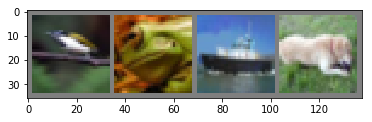

 bird  frog  ship   dog


In [19]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [21]:
labels

tensor([2, 6, 8, 5])

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## CPU

In [113]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [114]:
%%time
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss/2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.248
[1,  4000] loss: 1.898
[1,  6000] loss: 1.689
[1,  8000] loss: 1.586
[1, 10000] loss: 1.524
[1, 12000] loss: 1.482
[2,  2000] loss: 1.403
[2,  4000] loss: 1.375
[2,  6000] loss: 1.337
[2,  8000] loss: 1.314
[2, 10000] loss: 1.298
[2, 12000] loss: 1.293
Finished Training
CPU times: user 11min 25s, sys: 8.44 s, total: 11min 33s
Wall time: 1min 4s


In [115]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

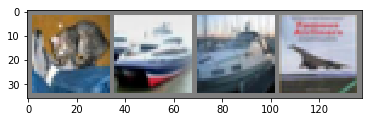

GroundTruth:    cat  ship  ship plane


In [116]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [117]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [118]:
print(outputs)

tensor([[ 1.4207, -3.5719,  0.9410,  1.6256,  0.1443,  0.2854, -0.2622, -2.2424,
          3.4879, -1.0709],
        [ 4.8923,  5.4588, -1.9102, -3.3315, -3.2704, -4.7861, -4.8408, -5.0523,
          7.0695,  5.3755],
        [ 2.9096,  3.6955, -1.2861, -1.5267, -2.5113, -2.7682, -2.9597, -3.3473,
          4.2722,  3.3682],
        [ 4.6852,  0.8598,  0.6034, -2.2285, -1.0871, -4.2787, -2.7186, -4.6657,
          6.6943,  1.9980]], grad_fn=<AddmmBackward>)


In [119]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   ship  ship  ship  ship


In [120]:
%%time
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %
CPU times: user 13 s, sys: 345 ms, total: 13.4 s
Wall time: 2.3 s


In [121]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 59 %
Accuracy of   car : 55 %
Accuracy of  bird : 20 %
Accuracy of   cat : 25 %
Accuracy of  deer : 67 %
Accuracy of   dog : 45 %
Accuracy of  frog : 46 %
Accuracy of horse : 59 %
Accuracy of  ship : 80 %
Accuracy of truck : 70 %


## GPU

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [24]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [29]:
%%time
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        print(type(data))
        inputs, labels = data[0].to(device), data[1].to(device)
        print(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss/2000))
            running_loss = 0.0

print('Finished Training')

<class 'list'>
tensor([1, 8, 0, 8], device='cuda:0')
<class 'list'>
tensor([0, 4, 8, 4], device='cuda:0')
<class 'list'>
tensor([5, 1, 6, 4], device='cuda:0')
<class 'list'>
tensor([5, 9, 2, 9], device='cuda:0')
<class 'list'>
tensor([4, 9, 6, 1], device='cuda:0')
<class 'list'>
tensor([8, 7, 2, 0], device='cuda:0')
<class 'list'>
tensor([5, 4, 1, 2], device='cuda:0')
<class 'list'>
tensor([2, 4, 1, 7], device='cuda:0')
<class 'list'>
tensor([5, 3, 3, 9], device='cuda:0')
<class 'list'>
tensor([1, 8, 0, 2], device='cuda:0')
<class 'list'>
tensor([9, 1, 6, 7], device='cuda:0')
<class 'list'>
tensor([2, 9, 7, 2], device='cuda:0')
<class 'list'>
tensor([4, 1, 1, 2], device='cuda:0')
<class 'list'>
tensor([7, 0, 6, 7], device='cuda:0')
<class 'list'>
tensor([1, 4, 6, 6], device='cuda:0')
<class 'list'>
tensor([5, 0, 1, 0], device='cuda:0')
<class 'list'>
tensor([9, 4, 9, 7], device='cuda:0')
<class 'list'>
tensor([8, 3, 5, 2], device='cuda:0')
<class 'list'>
tensor([6, 4, 3, 2], device='cu

<class 'list'>
tensor([8, 6, 0, 7], device='cuda:0')
<class 'list'>
tensor([1, 8, 2, 4], device='cuda:0')
<class 'list'>
tensor([3, 9, 5, 4], device='cuda:0')
<class 'list'>
tensor([1, 0, 0, 9], device='cuda:0')
<class 'list'>
tensor([5, 4, 5, 7], device='cuda:0')
<class 'list'>
tensor([2, 4, 3, 9], device='cuda:0')
<class 'list'>
tensor([8, 2, 2, 0], device='cuda:0')
<class 'list'>
tensor([2, 7, 3, 0], device='cuda:0')
<class 'list'>
tensor([6, 7, 7, 8], device='cuda:0')
<class 'list'>
tensor([2, 1, 6, 6], device='cuda:0')
<class 'list'>
tensor([9, 2, 1, 7], device='cuda:0')
<class 'list'>
tensor([7, 9, 1, 3], device='cuda:0')
<class 'list'>
tensor([9, 6, 9, 9], device='cuda:0')
<class 'list'>
tensor([6, 9, 9, 1], device='cuda:0')
<class 'list'>
tensor([8, 7, 2, 8], device='cuda:0')
<class 'list'>
tensor([9, 9, 2, 3], device='cuda:0')
<class 'list'>
tensor([6, 5, 3, 3], device='cuda:0')
<class 'list'>
tensor([4, 4, 6, 6], device='cuda:0')
<class 'list'>
tensor([0, 8, 0, 5], device='cu

<class 'list'>
tensor([2, 8, 6, 5], device='cuda:0')
<class 'list'>
tensor([9, 9, 4, 2], device='cuda:0')
<class 'list'>
tensor([7, 5, 7, 4], device='cuda:0')
<class 'list'>
tensor([1, 3, 2, 4], device='cuda:0')
<class 'list'>
tensor([1, 1, 5, 6], device='cuda:0')
<class 'list'>
tensor([3, 3, 9, 5], device='cuda:0')
<class 'list'>
tensor([3, 6, 2, 3], device='cuda:0')
<class 'list'>
tensor([0, 1, 8, 5], device='cuda:0')
<class 'list'>
tensor([1, 7, 5, 4], device='cuda:0')
<class 'list'>
tensor([6, 2, 0, 8], device='cuda:0')
<class 'list'>
tensor([5, 8, 3, 7], device='cuda:0')
<class 'list'>
tensor([6, 4, 5, 5], device='cuda:0')
<class 'list'>
tensor([6, 7, 2, 1], device='cuda:0')
<class 'list'>
tensor([0, 0, 5, 9], device='cuda:0')
<class 'list'>
tensor([0, 0, 2, 0], device='cuda:0')
<class 'list'>
tensor([9, 9, 9, 8], device='cuda:0')
<class 'list'>
tensor([2, 2, 4, 9], device='cuda:0')
<class 'list'>
tensor([5, 3, 2, 7], device='cuda:0')
<class 'list'>
tensor([1, 3, 0, 0], device='cu

<class 'list'>
tensor([9, 8, 5, 4], device='cuda:0')
<class 'list'>
tensor([8, 1, 2, 8], device='cuda:0')
<class 'list'>
tensor([4, 2, 3, 1], device='cuda:0')
<class 'list'>
tensor([8, 1, 0, 4], device='cuda:0')
<class 'list'>
tensor([6, 5, 0, 7], device='cuda:0')
<class 'list'>
tensor([0, 2, 9, 3], device='cuda:0')
<class 'list'>
tensor([9, 2, 5, 6], device='cuda:0')
<class 'list'>
tensor([4, 7, 9, 7], device='cuda:0')
<class 'list'>
tensor([6, 6, 4, 7], device='cuda:0')
<class 'list'>
tensor([2, 2, 5, 8], device='cuda:0')
<class 'list'>
tensor([0, 1, 8, 6], device='cuda:0')
<class 'list'>
tensor([2, 1, 2, 9], device='cuda:0')
<class 'list'>
tensor([9, 6, 8, 3], device='cuda:0')
<class 'list'>
tensor([0, 6, 2, 6], device='cuda:0')
<class 'list'>
tensor([5, 0, 1, 9], device='cuda:0')
<class 'list'>
tensor([3, 5, 9, 4], device='cuda:0')
<class 'list'>
tensor([4, 4, 7, 0], device='cuda:0')
<class 'list'>
tensor([4, 7, 7, 3], device='cuda:0')
<class 'list'>
tensor([1, 0, 7, 7], device='cu

tensor([8, 6, 2, 7], device='cuda:0')
<class 'list'>
tensor([8, 6, 2, 1], device='cuda:0')
<class 'list'>
tensor([4, 3, 1, 1], device='cuda:0')
<class 'list'>
tensor([3, 4, 7, 0], device='cuda:0')
<class 'list'>
tensor([2, 7, 3, 1], device='cuda:0')
<class 'list'>
tensor([9, 8, 6, 2], device='cuda:0')
<class 'list'>
tensor([5, 4, 2, 0], device='cuda:0')
<class 'list'>
tensor([8, 5, 9, 1], device='cuda:0')
<class 'list'>
tensor([0, 3, 4, 0], device='cuda:0')
<class 'list'>
tensor([7, 6, 9, 2], device='cuda:0')
<class 'list'>
tensor([0, 7, 3, 0], device='cuda:0')
<class 'list'>
tensor([7, 9, 8, 7], device='cuda:0')
<class 'list'>
tensor([7, 9, 9, 6], device='cuda:0')
<class 'list'>
tensor([0, 8, 3, 5], device='cuda:0')
<class 'list'>
tensor([9, 3, 9, 8], device='cuda:0')
<class 'list'>
tensor([5, 6, 3, 3], device='cuda:0')
<class 'list'>
tensor([4, 3, 5, 3], device='cuda:0')
<class 'list'>
tensor([8, 9, 7, 2], device='cuda:0')
<class 'list'>
tensor([4, 7, 9, 2], device='cuda:0')
<class '

tensor([0, 9, 7, 3], device='cuda:0')
<class 'list'>
tensor([5, 5, 2, 6], device='cuda:0')
<class 'list'>
tensor([6, 2, 7, 3], device='cuda:0')
<class 'list'>
tensor([6, 8, 1, 9], device='cuda:0')
<class 'list'>
tensor([5, 8, 9, 7], device='cuda:0')
<class 'list'>
tensor([5, 9, 0, 6], device='cuda:0')
<class 'list'>
tensor([1, 3, 2, 9], device='cuda:0')
<class 'list'>
tensor([9, 5, 8, 6], device='cuda:0')
<class 'list'>
tensor([2, 1, 4, 6], device='cuda:0')
<class 'list'>
tensor([7, 2, 4, 8], device='cuda:0')
<class 'list'>
tensor([1, 3, 2, 5], device='cuda:0')
<class 'list'>
tensor([1, 2, 0, 1], device='cuda:0')
<class 'list'>
tensor([6, 6, 0, 8], device='cuda:0')
<class 'list'>
tensor([1, 2, 5, 6], device='cuda:0')
<class 'list'>
tensor([7, 4, 5, 7], device='cuda:0')
<class 'list'>
tensor([8, 6, 4, 6], device='cuda:0')
<class 'list'>
tensor([5, 5, 7, 3], device='cuda:0')
<class 'list'>
tensor([0, 2, 2, 5], device='cuda:0')
<class 'list'>
tensor([0, 7, 0, 7], device='cuda:0')
<class '

<class 'list'>
tensor([4, 4, 5, 2], device='cuda:0')
<class 'list'>
tensor([3, 5, 9, 6], device='cuda:0')
<class 'list'>
tensor([1, 6, 2, 8], device='cuda:0')
<class 'list'>
tensor([6, 1, 4, 2], device='cuda:0')
<class 'list'>
tensor([4, 0, 7, 9], device='cuda:0')
<class 'list'>
tensor([1, 3, 0, 7], device='cuda:0')
<class 'list'>
tensor([7, 1, 5, 6], device='cuda:0')
<class 'list'>
tensor([6, 0, 6, 0], device='cuda:0')
<class 'list'>
tensor([1, 2, 0, 8], device='cuda:0')
<class 'list'>
tensor([7, 5, 8, 5], device='cuda:0')
<class 'list'>
tensor([1, 5, 9, 1], device='cuda:0')
<class 'list'>
tensor([5, 0, 4, 6], device='cuda:0')
<class 'list'>
tensor([2, 1, 3, 1], device='cuda:0')
<class 'list'>
tensor([8, 5, 7, 3], device='cuda:0')
<class 'list'>
tensor([6, 6, 3, 1], device='cuda:0')
<class 'list'>
tensor([8, 9, 1, 1], device='cuda:0')
<class 'list'>
tensor([2, 7, 5, 7], device='cuda:0')
<class 'list'>
tensor([5, 1, 8, 5], device='cuda:0')
<class 'list'>
tensor([2, 1, 3, 9], device='cu

tensor([4, 9, 9, 3], device='cuda:0')
<class 'list'>
tensor([6, 7, 0, 8], device='cuda:0')
<class 'list'>
tensor([0, 1, 7, 6], device='cuda:0')
<class 'list'>
tensor([6, 9, 7, 2], device='cuda:0')
<class 'list'>
tensor([1, 6, 5, 5], device='cuda:0')
<class 'list'>
tensor([8, 0, 8, 5], device='cuda:0')
<class 'list'>
tensor([2, 3, 0, 8], device='cuda:0')
<class 'list'>
tensor([5, 8, 8, 8], device='cuda:0')
<class 'list'>
tensor([4, 4, 1, 5], device='cuda:0')
<class 'list'>
tensor([5, 7, 8, 9], device='cuda:0')
<class 'list'>
tensor([9, 8, 6, 6], device='cuda:0')
<class 'list'>
tensor([8, 2, 5, 8], device='cuda:0')
<class 'list'>
tensor([4, 7, 5, 8], device='cuda:0')
<class 'list'>
tensor([4, 7, 8, 3], device='cuda:0')
<class 'list'>
tensor([3, 9, 2, 8], device='cuda:0')
<class 'list'>
tensor([2, 6, 3, 5], device='cuda:0')
<class 'list'>
tensor([8, 0, 0, 7], device='cuda:0')
<class 'list'>
tensor([1, 7, 4, 5], device='cuda:0')
<class 'list'>
tensor([8, 4, 8, 8], device='cuda:0')
<class '

<class 'list'>
tensor([3, 8, 5, 2], device='cuda:0')
<class 'list'>
tensor([1, 4, 0, 4], device='cuda:0')
<class 'list'>
tensor([5, 6, 2, 3], device='cuda:0')
<class 'list'>
tensor([4, 2, 4, 6], device='cuda:0')
<class 'list'>
tensor([1, 9, 3, 8], device='cuda:0')
<class 'list'>
tensor([4, 1, 3, 9], device='cuda:0')
<class 'list'>
tensor([0, 7, 8, 1], device='cuda:0')
<class 'list'>
tensor([9, 2, 1, 4], device='cuda:0')
<class 'list'>
tensor([1, 7, 9, 2], device='cuda:0')
<class 'list'>
tensor([3, 9, 3, 3], device='cuda:0')
<class 'list'>
tensor([3, 9, 6, 1], device='cuda:0')
<class 'list'>
tensor([2, 3, 7, 8], device='cuda:0')
<class 'list'>
tensor([3, 3, 1, 5], device='cuda:0')
<class 'list'>
tensor([7, 1, 1, 2], device='cuda:0')
<class 'list'>
tensor([5, 4, 6, 6], device='cuda:0')
<class 'list'>
tensor([8, 9, 3, 2], device='cuda:0')
<class 'list'>
tensor([7, 5, 3, 3], device='cuda:0')
<class 'list'>
tensor([0, 8, 8, 5], device='cuda:0')
<class 'list'>
tensor([7, 5, 5, 3], device='cu

<class 'list'>
tensor([9, 7, 7, 2], device='cuda:0')
<class 'list'>
tensor([9, 6, 0, 4], device='cuda:0')
<class 'list'>
tensor([7, 9, 0, 4], device='cuda:0')
<class 'list'>
tensor([5, 1, 6, 7], device='cuda:0')
<class 'list'>
tensor([3, 1, 5, 5], device='cuda:0')
<class 'list'>
tensor([6, 2, 5, 9], device='cuda:0')
<class 'list'>
tensor([0, 8, 2, 8], device='cuda:0')
<class 'list'>
tensor([9, 3, 7, 2], device='cuda:0')
<class 'list'>
tensor([9, 1, 8, 2], device='cuda:0')
<class 'list'>
tensor([4, 6, 9, 5], device='cuda:0')
<class 'list'>
tensor([4, 3, 6, 1], device='cuda:0')
<class 'list'>
tensor([5, 3, 9, 8], device='cuda:0')
<class 'list'>
tensor([0, 4, 6, 3], device='cuda:0')
<class 'list'>
tensor([0, 7, 0, 1], device='cuda:0')
<class 'list'>
tensor([2, 8, 5, 0], device='cuda:0')
<class 'list'>
tensor([1, 7, 1, 2], device='cuda:0')
<class 'list'>
tensor([4, 7, 4, 9], device='cuda:0')
<class 'list'>
tensor([4, 4, 6, 9], device='cuda:0')
<class 'list'>
tensor([9, 5, 9, 2], device='cu

tensor([4, 3, 2, 5], device='cuda:0')
<class 'list'>
tensor([7, 4, 1, 3], device='cuda:0')
<class 'list'>
tensor([9, 9, 9, 3], device='cuda:0')
<class 'list'>
tensor([1, 2, 8, 7], device='cuda:0')
<class 'list'>
tensor([1, 1, 3, 0], device='cuda:0')
<class 'list'>
tensor([9, 5, 8, 5], device='cuda:0')
<class 'list'>
tensor([7, 6, 9, 2], device='cuda:0')
<class 'list'>
tensor([8, 9, 0, 2], device='cuda:0')
<class 'list'>
tensor([3, 8, 8, 4], device='cuda:0')
<class 'list'>
tensor([5, 4, 6, 9], device='cuda:0')
<class 'list'>
tensor([2, 1, 3, 1], device='cuda:0')
<class 'list'>
tensor([9, 9, 6, 9], device='cuda:0')
<class 'list'>
tensor([6, 9, 5, 2], device='cuda:0')
<class 'list'>
tensor([5, 5, 8, 1], device='cuda:0')
<class 'list'>
tensor([8, 0, 7, 9], device='cuda:0')
<class 'list'>
tensor([0, 0, 7, 7], device='cuda:0')
<class 'list'>
tensor([5, 6, 5, 5], device='cuda:0')
<class 'list'>
tensor([2, 3, 6, 8], device='cuda:0')
<class 'list'>
tensor([3, 3, 4, 9], device='cuda:0')
<class '

<class 'list'>
tensor([9, 7, 5, 0], device='cuda:0')
<class 'list'>
tensor([8, 1, 5, 8], device='cuda:0')
<class 'list'>
tensor([6, 6, 4, 7], device='cuda:0')
<class 'list'>
tensor([9, 3, 7, 3], device='cuda:0')
<class 'list'>
tensor([0, 6, 3, 8], device='cuda:0')
<class 'list'>
tensor([9, 2, 2, 2], device='cuda:0')
<class 'list'>
tensor([3, 5, 8, 5], device='cuda:0')
<class 'list'>
tensor([2, 1, 7, 7], device='cuda:0')
<class 'list'>
tensor([7, 7, 1, 2], device='cuda:0')
<class 'list'>
tensor([7, 1, 8, 9], device='cuda:0')
<class 'list'>
tensor([7, 2, 2, 1], device='cuda:0')
<class 'list'>
tensor([8, 9, 3, 5], device='cuda:0')
<class 'list'>
tensor([0, 6, 8, 5], device='cuda:0')
<class 'list'>
tensor([6, 0, 0, 5], device='cuda:0')
<class 'list'>
tensor([1, 4, 8, 8], device='cuda:0')
<class 'list'>
tensor([0, 3, 4, 5], device='cuda:0')
<class 'list'>
tensor([5, 6, 2, 1], device='cuda:0')
<class 'list'>
tensor([9, 2, 9, 4], device='cuda:0')
<class 'list'>
tensor([0, 3, 2, 0], device='cu

tensor([5, 7, 8, 7], device='cuda:0')
<class 'list'>
tensor([4, 6, 5, 1], device='cuda:0')
<class 'list'>
tensor([6, 4, 5, 5], device='cuda:0')
<class 'list'>
tensor([4, 7, 7, 1], device='cuda:0')
<class 'list'>
tensor([3, 5, 9, 8], device='cuda:0')
<class 'list'>
tensor([6, 4, 4, 0], device='cuda:0')
<class 'list'>
tensor([5, 3, 7, 1], device='cuda:0')
<class 'list'>
tensor([6, 6, 2, 3], device='cuda:0')
<class 'list'>
tensor([1, 7, 6, 5], device='cuda:0')
<class 'list'>
tensor([8, 1, 0, 3], device='cuda:0')
<class 'list'>
tensor([1, 8, 9, 8], device='cuda:0')
<class 'list'>
tensor([0, 2, 0, 5], device='cuda:0')
<class 'list'>
tensor([5, 6, 4, 2], device='cuda:0')
<class 'list'>
tensor([4, 7, 1, 4], device='cuda:0')
<class 'list'>
tensor([1, 1, 0, 1], device='cuda:0')
<class 'list'>
tensor([0, 7, 3, 8], device='cuda:0')
<class 'list'>
tensor([7, 1, 3, 1], device='cuda:0')
<class 'list'>
tensor([5, 4, 5, 6], device='cuda:0')
<class 'list'>
tensor([2, 0, 7, 7], device='cuda:0')
<class '

<class 'list'>
tensor([1, 9, 5, 9], device='cuda:0')
<class 'list'>
tensor([8, 0, 0, 1], device='cuda:0')
<class 'list'>
tensor([5, 0, 5, 8], device='cuda:0')
<class 'list'>
tensor([9, 9, 8, 0], device='cuda:0')
<class 'list'>
tensor([0, 8, 9, 9], device='cuda:0')
<class 'list'>
tensor([0, 7, 2, 8], device='cuda:0')
<class 'list'>
tensor([7, 9, 9, 0], device='cuda:0')
<class 'list'>
tensor([4, 0, 1, 5], device='cuda:0')
<class 'list'>
tensor([5, 9, 7, 5], device='cuda:0')
<class 'list'>
tensor([8, 0, 6, 9], device='cuda:0')
<class 'list'>
tensor([0, 1, 5, 0], device='cuda:0')
<class 'list'>
tensor([5, 5, 7, 1], device='cuda:0')
<class 'list'>
tensor([6, 8, 3, 0], device='cuda:0')
<class 'list'>
tensor([1, 0, 0, 9], device='cuda:0')
<class 'list'>
tensor([4, 4, 9, 8], device='cuda:0')
<class 'list'>
tensor([4, 0, 6, 4], device='cuda:0')
<class 'list'>
tensor([4, 2, 6, 6], device='cuda:0')
<class 'list'>
tensor([1, 3, 7, 5], device='cuda:0')
<class 'list'>
tensor([1, 4, 3, 5], device='cu

tensor([4, 7, 7, 6], device='cuda:0')
<class 'list'>
tensor([0, 6, 5, 7], device='cuda:0')
<class 'list'>
tensor([4, 0, 7, 3], device='cuda:0')
<class 'list'>
tensor([7, 2, 3, 7], device='cuda:0')
<class 'list'>
tensor([2, 9, 6, 6], device='cuda:0')
<class 'list'>
tensor([8, 9, 6, 9], device='cuda:0')
<class 'list'>
tensor([0, 5, 6, 0], device='cuda:0')
<class 'list'>
tensor([4, 1, 1, 3], device='cuda:0')
<class 'list'>
tensor([1, 2, 3, 6], device='cuda:0')
<class 'list'>
tensor([6, 4, 6, 7], device='cuda:0')
<class 'list'>
tensor([8, 4, 2, 5], device='cuda:0')
<class 'list'>
tensor([4, 8, 1, 4], device='cuda:0')
<class 'list'>
tensor([4, 2, 9, 1], device='cuda:0')
<class 'list'>
tensor([9, 7, 2, 0], device='cuda:0')
<class 'list'>
tensor([3, 4, 3, 6], device='cuda:0')
<class 'list'>
tensor([1, 4, 2, 6], device='cuda:0')
<class 'list'>
tensor([4, 8, 9, 3], device='cuda:0')
<class 'list'>
tensor([3, 4, 1, 6], device='cuda:0')
<class 'list'>
tensor([7, 6, 6, 6], device='cuda:0')
<class '

tensor([5, 3, 4, 9], device='cuda:0')
<class 'list'>
tensor([3, 3, 0, 9], device='cuda:0')
<class 'list'>
tensor([6, 1, 4, 0], device='cuda:0')
<class 'list'>
tensor([2, 4, 1, 5], device='cuda:0')
<class 'list'>
tensor([1, 8, 4, 8], device='cuda:0')
<class 'list'>
tensor([9, 6, 4, 5], device='cuda:0')
<class 'list'>
tensor([1, 1, 9, 5], device='cuda:0')
<class 'list'>
tensor([9, 2, 8, 3], device='cuda:0')
<class 'list'>
tensor([1, 7, 8, 1], device='cuda:0')
<class 'list'>
tensor([1, 6, 0, 1], device='cuda:0')
<class 'list'>
tensor([4, 1, 2, 2], device='cuda:0')
<class 'list'>
tensor([4, 0, 8, 2], device='cuda:0')
<class 'list'>
tensor([2, 3, 9, 7], device='cuda:0')
<class 'list'>
tensor([1, 6, 5, 3], device='cuda:0')
<class 'list'>
tensor([3, 6, 2, 9], device='cuda:0')
<class 'list'>
tensor([0, 2, 5, 5], device='cuda:0')
<class 'list'>
tensor([1, 6, 7, 7], device='cuda:0')
<class 'list'>
tensor([1, 4, 0, 2], device='cuda:0')
<class 'list'>
tensor([5, 0, 9, 4], device='cuda:0')
<class '

tensor([4, 7, 6, 6], device='cuda:0')
<class 'list'>
tensor([7, 5, 1, 5], device='cuda:0')
<class 'list'>
tensor([9, 8, 8, 0], device='cuda:0')
<class 'list'>
tensor([6, 4, 1, 9], device='cuda:0')
<class 'list'>
tensor([0, 6, 0, 5], device='cuda:0')
<class 'list'>
tensor([0, 2, 3, 4], device='cuda:0')
<class 'list'>
tensor([3, 9, 1, 2], device='cuda:0')
<class 'list'>
tensor([3, 9, 9, 4], device='cuda:0')
<class 'list'>
tensor([1, 9, 2, 8], device='cuda:0')
<class 'list'>
tensor([8, 3, 8, 9], device='cuda:0')
<class 'list'>
tensor([3, 9, 3, 5], device='cuda:0')
<class 'list'>
tensor([6, 9, 7, 2], device='cuda:0')
<class 'list'>
tensor([5, 5, 6, 6], device='cuda:0')
<class 'list'>
tensor([0, 7, 8, 9], device='cuda:0')
<class 'list'>
tensor([5, 3, 7, 9], device='cuda:0')
<class 'list'>
tensor([0, 7, 8, 9], device='cuda:0')
<class 'list'>
tensor([8, 5, 3, 3], device='cuda:0')
<class 'list'>
tensor([8, 6, 5, 8], device='cuda:0')
<class 'list'>
tensor([3, 5, 6, 6], device='cuda:0')
<class '

<class 'list'>
tensor([4, 2, 5, 1], device='cuda:0')
<class 'list'>
tensor([0, 4, 4, 6], device='cuda:0')
<class 'list'>
tensor([1, 1, 9, 6], device='cuda:0')
<class 'list'>
tensor([2, 0, 1, 6], device='cuda:0')
<class 'list'>
tensor([1, 7, 1, 7], device='cuda:0')
<class 'list'>
tensor([3, 3, 2, 0], device='cuda:0')
<class 'list'>
tensor([0, 1, 0, 4], device='cuda:0')
<class 'list'>
tensor([6, 3, 2, 5], device='cuda:0')
<class 'list'>
tensor([3, 7, 6, 9], device='cuda:0')
<class 'list'>
tensor([7, 4, 8, 1], device='cuda:0')
<class 'list'>
tensor([2, 2, 9, 8], device='cuda:0')
<class 'list'>
tensor([8, 6, 7, 0], device='cuda:0')
<class 'list'>
tensor([8, 3, 3, 6], device='cuda:0')
<class 'list'>
tensor([8, 3, 2, 3], device='cuda:0')
<class 'list'>
tensor([5, 3, 3, 9], device='cuda:0')
<class 'list'>
tensor([9, 3, 8, 8], device='cuda:0')
<class 'list'>
tensor([0, 7, 6, 7], device='cuda:0')
<class 'list'>
tensor([1, 9, 7, 7], device='cuda:0')
<class 'list'>
tensor([3, 3, 6, 3], device='cu

tensor([5, 1, 3, 6], device='cuda:0')
<class 'list'>
tensor([9, 2, 3, 4], device='cuda:0')
<class 'list'>
tensor([2, 6, 2, 7], device='cuda:0')
<class 'list'>
tensor([8, 2, 7, 8], device='cuda:0')
<class 'list'>
tensor([5, 0, 8, 9], device='cuda:0')
<class 'list'>
tensor([4, 4, 8, 2], device='cuda:0')
<class 'list'>
tensor([9, 4, 4, 0], device='cuda:0')
<class 'list'>
tensor([8, 9, 3, 5], device='cuda:0')
<class 'list'>
tensor([2, 6, 8, 1], device='cuda:0')
<class 'list'>
tensor([8, 7, 9, 5], device='cuda:0')
<class 'list'>
tensor([8, 3, 1, 7], device='cuda:0')
<class 'list'>
tensor([3, 8, 2, 1], device='cuda:0')
<class 'list'>
tensor([2, 4, 3, 8], device='cuda:0')
<class 'list'>
tensor([3, 5, 5, 7], device='cuda:0')
<class 'list'>
tensor([8, 5, 2, 1], device='cuda:0')
<class 'list'>
tensor([2, 8, 1, 2], device='cuda:0')
<class 'list'>
tensor([0, 6, 8, 3], device='cuda:0')
<class 'list'>
tensor([6, 8, 5, 2], device='cuda:0')
<class 'list'>
tensor([6, 4, 7, 1], device='cuda:0')
<class '

<class 'list'>
tensor([8, 5, 6, 2], device='cuda:0')
<class 'list'>
tensor([4, 4, 3, 5], device='cuda:0')
<class 'list'>
tensor([9, 9, 8, 8], device='cuda:0')
<class 'list'>
tensor([0, 9, 0, 6], device='cuda:0')
<class 'list'>
tensor([6, 2, 8, 2], device='cuda:0')
<class 'list'>
tensor([0, 7, 6, 3], device='cuda:0')
<class 'list'>
tensor([6, 0, 2, 4], device='cuda:0')
<class 'list'>
tensor([6, 7, 1, 4], device='cuda:0')
<class 'list'>
tensor([9, 4, 0, 0], device='cuda:0')
<class 'list'>
tensor([3, 1, 9, 5], device='cuda:0')
<class 'list'>
tensor([3, 2, 0, 4], device='cuda:0')
<class 'list'>
tensor([0, 0, 6, 4], device='cuda:0')
<class 'list'>
tensor([1, 5, 9, 8], device='cuda:0')
<class 'list'>
tensor([5, 7, 5, 8], device='cuda:0')
<class 'list'>
tensor([4, 7, 0, 7], device='cuda:0')
<class 'list'>
tensor([9, 2, 7, 2], device='cuda:0')
<class 'list'>
tensor([7, 0, 6, 9], device='cuda:0')
<class 'list'>
tensor([4, 3, 1, 4], device='cuda:0')
<class 'list'>
tensor([1, 6, 2, 6], device='cu

KeyboardInterrupt: 

In [126]:
%%time
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %
CPU times: user 1.9 s, sys: 317 ms, total: 2.21 s
Wall time: 2.36 s
